Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Amanda Garrido"
COLLABORATORS = "none"

# Project Name: The Relationship Between Exercise, Stress Levels, and Sleep Quality in Students
Description: Use a variety of health record datasets to analyze the relationship between exercise, sleep quality, and stress levels in students. 

## Table of Contents:
1. Data Generation: ...
2. Data Cleaning ...
3. Visualization ...
4. Analysis / Modeling ...


In [2]:
# Import necessary libraries 
import pandas as pd
import numpy as np 
import random
from matplotlib import pyplot as plt
import math 
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import minmax_scale
import random 
import seaborn as sns

import csv
import re #regular expression 



import sqlite3 
conn = sqlite3.connect("database_name.db")
print("connected to database successfully!")



connected to database successfully!


## 1. Data Generation
First, we will import the datasets. We are working with four datasets, sourced from Kaggle.com, initially titled as the following: 

1. Student Stress Factors: a Comprehensive Analysis
2. Student Mental Health Survey
3. Lifestyle and Wellbeing Data
4. Human Stress Detection in and through Sleep

These datasets will have the following names through the code, respectively: (stud_stress, mentalhealth, lifestyle_wellbeing, stress_sleep)

In [3]:
#Import the datasets: 
# We are working with five datasets: 
    # 1. stud_stress
    # 2. mentalhealth
    # 3. lifestyle_wellbeing 
    # 4. stress_sleep 

# We will also store the dataframes in a list for easy indexed accessing later on: 
df_list = []
df_names = ['stud_stressdf', 'mentalhealthdf', 'lifestyle_wellbeingdf', 'stress_sleepdf']

stud_stressdf = pd.read_csv("stud_stress.csv")
mentalhealthdf = pd.read_csv("mentalhealth.csv")
lifestyle_wellbeingdf = pd.read_csv("lifestyle_wellbeing.csv")
stress_sleepdf = pd.read_csv("stress_sleep.csv")


# We have verified that the datasets were imported successfully, now we can move onto data cleaning. 


## 2. Data Cleaning
Our datasets are relatively clean, meaning it is known that there are no missing values, though we will do one sweep through the datasets just to confirm. The focus of this data cleaning will be to rid the datasets of columns that are irrelevant to this project, and concatenate the datasets into one that will be used to implement this project. 

In [4]:
# Recall, datasets: 
    # 1. stud_stress
    # 2. mentalhealth
    # 3. lifestyle_wellbeing 
    # 4. stress_sleep 

# A. First we will omit irrelevant columns


# 1. stud_stressdf:
# First we will remove certain data entries that may constrew the results: 
  # remove if : living conditions, safety, basic needs was set to 0; these factors will likely affect stress, therefore we can't conclude that the stress is due to sleep, exercise, etc. 

stud_stressrows = len(stud_stressdf)

for index in range(0, stud_stressrows):
    if (stud_stressdf['living_conditions'][index] == 0) or (stud_stressdf['safety'][index] == 0) or (stud_stressdf['basic_needs'][index] == 0):
        stud_stressdf = stud_stressdf.drop(index)


# Now we will drop the columns of the database that we will not be using. 
stud_stressdf = stud_stressdf[['sleep_quality', 'academic_performance', 'stress_level']].copy()

# Now we do the same for the remaining dataframes: 

#------------------------
# 2. mentalhealthdf:
mentalhealthrows = len(mentalhealthdf)

# columns that we care about: CGPA, Stress_Level, Sleep_Quality, Physical_Activity 
# We will drop the columns of the database that we will not be using. 
mentalhealthdf = mentalhealthdf[['Stress_Level', 'Physical_Activity']].copy()
mentalhealthdf = mentalhealthdf.rename(columns={'Stress_Level': 'stress_level', 'Physical_Activity': 'physical_activity'})

#------------------------
# 3. lifestyle_wellbeingdf:
lifestyle_wellbeingrows = len(lifestyle_wellbeingdf)

#First we will remove the data entries with an age range outside of our desired set: (18-25)

for index in range(0, lifestyle_wellbeingrows):
    if (lifestyle_wellbeingdf['AGE'][index] != '21 to 35'):
        lifestyle_wellbeingdf = lifestyle_wellbeingdf.drop(index)


# columns that we care about: DAILY_STRESS, SLEEP_HOURS
# We will drop the columns of the database that we will not be using. 
lifestyle_wellbeingdf = lifestyle_wellbeingdf[['DAILY_STRESS', 'SLEEP_HOURS']].copy()
lifestyle_wellbeingdf = lifestyle_wellbeingdf.rename(columns={'DAILY_STRESS': 'daily_stress', 'SLEEP_HOURS': 'sleep_hours'})

  
        #if type(value) != int and type(value) != float:
            #
            

#------------------------
# 4. stress_sleep:
stress_sleeprows = len(stress_sleepdf)

#First we will remove the data entries with an age range outside of our desired set: (18-25)


#snoring rate, respitory rate, body temperature, limb movement, blood oxygen, eye movement, sleeping hours, heart rate, stress level
# We will drop the columns of the database that we will not be using. 
stress_sleepdf = stress_sleepdf[['sr.1', 'sl']].copy()
stress_sleepdf = stress_sleepdf.rename(columns={'sr.1': 'sleeping_hours', 'sl': 'stress_level'})



In [5]:


stress_sleepdf = stress_sleepdf.astype(int)


lifestyle_wellbeingdf = lifestyle_wellbeingdf.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
lifestyle_wellbeingdf = lifestyle_wellbeingdf.dropna()
          

In [6]:
# B. Then we will remove NaN values / correct errors in the datasets 
df_list.append(stud_stressdf)
df_list.append(mentalhealthdf)
df_list.append(lifestyle_wellbeingdf)
df_list.append(stress_sleepdf)


for dataframe in df_list:
    print(dataframe)



      sleep_quality  academic_performance  stress_level
0                 2                     3             1
1                 1                     1             2
2                 2                     2             1
3                 1                     2             2
4                 5                     4             1
...             ...                   ...           ...
1093              5                     5             0
1095              3                     2             1
1096              0                     0             2
1097              5                     5             0
1098              1                     2             2

[1018 rows x 3 columns]
      stress_level physical_activity
0                3          Moderate
1                0               Low
2                4               Low
3                2               Low
4                3               Low
...            ...               ...
7017             3               Low
7018   

In [7]:
# C. Now we will make sure that the measuringscale is the same for each dataframe:

#Dataframes: 
    # 1. stud_stress
        # sleep_quality [0-5] 
        # academic_performance [0-5]
        # stress_level [0-4]
    # 2. mentalhealth
        # stress_level [0-5]
        # physical_activity [low, moderate, high]
    # 3. lifestyle_wellbeing *
        # daily_stress [0-5]
        # sleep_hours [0-10]
    # 4. stress_sleep *
        # sleeping_hours [0-9]
        # stress_level [0-4] 

# MIN-MAX SCALING:
# WE WILL SCALE THE DATA 



# FOR EVERY DATAFRAME, we will perform minmax scalar on the necessary data. 
 #columns to scale: 
# sleep quality, academic performance, stress level, ... 
# basically everything besides sleep hours and physical activity 

#1 stud_stress
stud_stressdf[['sleep_quality', 'academic_performance', 'stress_level']] = minmax_scale(stud_stressdf[['sleep_quality', 'academic_performance', 'stress_level']])

#2 mentalhealth
#mentalhealthdf_scaled = scaler.fit_transform(mentalhealthdf) # Fit and transform the data
#mentalhealthdf = pd.DataFrame(mentalhealthdf_scaled, columns='stress_level') # Convert the scaled data back to a DataFrame

mentalhealthdf[['stress_level']] = minmax_scale(mentalhealthdf[['stress_level']])
# print(mentalhealthdf)

#3 lifestyle_wellbeing 
lifestyle_wellbeingdf[['daily_stress']] = minmax_scale(lifestyle_wellbeingdf[['daily_stress']])

#4 stress_sleep
stress_sleepdf[['stress_level']] = minmax_scale(stress_sleepdf[['stress_level']])

for dataframe in df_list:
    print(dataframe)

#print(stud_stressdf, mentalhealthdf)

      sleep_quality  academic_performance  stress_level
0               0.4                   0.6           0.5
1               0.2                   0.2           1.0
2               0.4                   0.4           0.5
3               0.2                   0.4           1.0
4               1.0                   0.8           0.5
...             ...                   ...           ...
1093            1.0                   1.0           0.0
1095            0.6                   0.4           0.5
1096            0.0                   0.0           1.0
1097            1.0                   1.0           0.0
1098            0.2                   0.4           1.0

[1018 rows x 3 columns]
      stress_level physical_activity
0              0.6          Moderate
1              0.0               Low
2              0.8               Low
3              0.4               Low
4              0.6               Low
...            ...               ...
7017           0.6               Low
7018   

In [8]:
import os
import pandas as pd
import sqlite3

# check if exists
if os.path.exists("temp.db"):
    os.remove("temp.db")
    print("temp.db has been deleted")
else:
    print("temp.db does not exist")

# Create a connection to the SQLite database
conn = sqlite3.connect('temp.db')
print("Opened database successfully")

try:
    # Write the DataFrame to tables in the SQLite database
    lifestyle_wellbeingdf.to_sql('Lifestyle', conn, if_exists='replace', index=False)
    stress_sleepdf.to_sql('Stress', conn, if_exists='replace', index=False)
    print("DataFrames written to database successfully")

    # Perform FULL OUTER JOIN and create calculated columns
    query = '''
    SELECT
        (COALESCE(Lifestyle.daily_stress, 0) + COALESCE(Stress.stress_level, 0)) AS combined_stress,
        (COALESCE(Lifestyle.sleep_hours, 0) + COALESCE(Stress.sleeping_hours, 0)) AS combined_sleep
    FROM Lifestyle
    FULL OUTER JOIN Stress
    ON Lifestyle.daily_stress = Stress.stress_level
    '''

    # Execute the query and fetch the result as a pandas DataFrame
    df = pd.read_sql_query(query, conn)
    print("Query executed successfully")
    print(df)

finally:
    # Ensure the connection is closed
    conn.close()
    print("Database connection closed")


# rename accordingly 
lifestyle_sleepdf = df

temp.db has been deleted
Opened database successfully
DataFrames written to database successfully
Query executed successfully
        combined_stress  combined_sleep
0                  0.80               6
1                  0.60              10
2                  0.80               7
3                  0.40               8
4                  0.60               8
...                 ...             ...
129105             0.50               2
129106             0.25               6
129107             0.50               3
129108             0.25               6
129109             0.50               4

[129110 rows x 2 columns]
Database connection closed


In [9]:
# now we are merging lifestyle_sleep and stud_stress over the stress level columns
#Dataframes: 
    # 1. stud_stress
        # sleep_quality [0-5]
        # academic_performance [0-5]
        # stress_level [0-4]
    # 2. mentalhealth
        # CGPA [0-4]
        # stress_level [0-5]
        # sleep_quality [poor, average, good]
        # physical_activity [low, moderate, high]
    # 3. lifestyle_sleep *
        # combined_stress 
        # combined_sleep [hours]


# check if exists
if os.path.exists("temp2.db"):
    os.remove("temp2.db")
    print("temp2.db has been deleted")
else:
    print("temp2.db does not exist")

# Create a connection to the SQLite database
conn = sqlite3.connect('temp2.db')
print("Opened database successfully")

try:
    # Write the DataFrame to tables in the SQLite database
    lifestyle_sleepdf.to_sql('lifestyle_sleep', conn, if_exists='replace', index=False)
    stud_stressdf.to_sql('stud_stress', conn, if_exists='replace', index=False)
    print("DataFrames written to database successfully")

    # Perform FULL OUTER JOIN and create calculated columns
    query = '''
    SELECT 
        stud_stress.sleep_quality,
        stud_stress.academic_performance,
        COALESCE(stud_stress.stress_level, lifestyle_sleep.combined_stress) AS combined_stress_level,
        lifestyle_sleep.combined_sleep
    FROM stud_stress
    FULL OUTER JOIN lifestyle_sleep
    ON stud_stress.stress_level = lifestyle_sleep.combined_stress    
    '''

    # Execute the query and fetch the result as a pandas DataFrame
    df = pd.read_sql_query(query, conn)
    print("Query executed successfully")
    df.dropna(inplace=True)
    print(df)

finally:
    # Ensure the connection is closed
    conn.close()
    print("Database connection closed")

lifestyle_studsleepdf = df 



temp2.db has been deleted
Opened database successfully
DataFrames written to database successfully
Query executed successfully
         sleep_quality  academic_performance  combined_stress_level  \
0                  0.4                   0.6                    0.5   
1                  0.4                   0.6                    0.5   
2                  0.4                   0.6                    0.5   
3                  0.4                   0.6                    0.5   
4                  0.4                   0.6                    0.5   
...                ...                   ...                    ...   
9431937            1.0                   1.0                    0.0   
9431938            1.0                   1.0                    0.0   
9431939            1.0                   1.0                    0.0   
9431940            1.0                   1.0                    0.0   
9431941            1.0                   1.0                    0.0   

         combined_sl

In [10]:
#there are too many items in this dataframe. 
# going to reduce the lifetyle_studsleep 

lifestyle_studsleepdf = lifestyle_studsleepdf.sample(frac=0.05)
print(lifestyle_studsleepdf)


mentalhealthdf = mentalhealthdf.sample(frac=0.1)

         sleep_quality  academic_performance  combined_stress_level  \
7044219            0.8                   0.8                    0.0   
2007597            0.8                   0.8                    0.0   
4744837            1.0                   1.0                    0.0   
8840035            0.8                   1.0                    0.0   
791202             1.0                   1.0                    0.0   
...                ...                   ...                    ...   
1120821            0.8                   0.8                    0.0   
3505945            0.2                   1.0                    0.0   
3321140            1.0                   1.0                    0.0   
5230548            0.8                   1.0                    0.0   
7321016            1.0                   0.4                    0.0   

         combined_sleep  
7044219            16.0  
2007597            14.0  
4744837            15.0  
8840035            15.0  
791202           

In [11]:
#Dataframes: 

    # 2. mentalhealth
        # stress_level [0-5]
        # physical_activity [low, moderate, high]
    # lifestyle_studsleep 
        # sleep_quality
        # academic_performance
        # combined_stress_level
        # combined_sleep (hours)

for index, row in lifestyle_studsleepdf.iterrows():
    if row['combined_stress_level'] == 0.0:
        row['combined_stress_level'] = round(random.random(), 1)


lifestyle_studsleepdf = lifestyle_studsleepdf.rename(columns={'combined_stress_level': 'stress_level'})



lifestyle_studsleepdf 
print(mentalhealthdf, lifestyle_studsleepdf)
lifestyle_studsleepdf




      stress_level physical_activity
4240           0.4              High
6193           0.0          Moderate
118            0.0              High
77             0.2          Moderate
5616           0.2          Moderate
...            ...               ...
4352           0.0          Moderate
5394           0.4               Low
710            0.8          Moderate
2949           0.4              High
4007           0.0              High

[702 rows x 2 columns]          sleep_quality  academic_performance  stress_level  combined_sleep
7044219            0.8                   0.8           0.1            16.0
2007597            0.8                   0.8           0.7            14.0
4744837            1.0                   1.0           0.7            15.0
8840035            0.8                   1.0           0.0            15.0
791202             1.0                   1.0           0.5            15.0
...                ...                   ...           ...             ...
1120821

,sleep_quality,academic_performance,stress_level,combined_sleep
7044219,0.8,0.8,0.1,16.0
2007597,0.8,0.8,0.7,14.0
4744837,1.0,1.0,0.7,15.0
8840035,0.8,1.0,0.0,15.0
791202,1.0,1.0,0.5,15.0
...,...,...,...,...
1120821,0.8,0.8,0.8,18.0
3505945,0.2,1.0,0.9,16.0
3321140,1.0,1.0,0.8,17.0
5230548,0.8,1.0,0.3,14.0


In [12]:
print(lifestyle_studsleepdf)
print('poop')

print(len(lifestyle_studsleepdf))

         sleep_quality  academic_performance  stress_level  combined_sleep
7044219            0.8                   0.8           0.1            16.0
2007597            0.8                   0.8           0.7            14.0
4744837            1.0                   1.0           0.7            15.0
8840035            0.8                   1.0           0.0            15.0
791202             1.0                   1.0           0.5            15.0
...                ...                   ...           ...             ...
1120821            0.8                   0.8           0.8            18.0
3505945            0.2                   1.0           0.9            16.0
3321140            1.0                   1.0           0.8            17.0
5230548            0.8                   1.0           0.3            14.0
7321016            1.0                   0.4           0.5            16.0

[471580 rows x 4 columns]
poop
471580


## Data Visualization

1. Data preparation

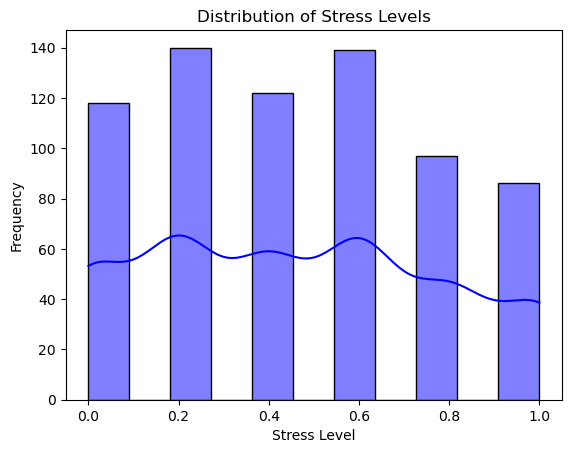

In [13]:

# to understand the values: 
# stress level distribution 

sns.histplot(mentalhealthdf['stress_level'], kde=True, color='blue')
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()

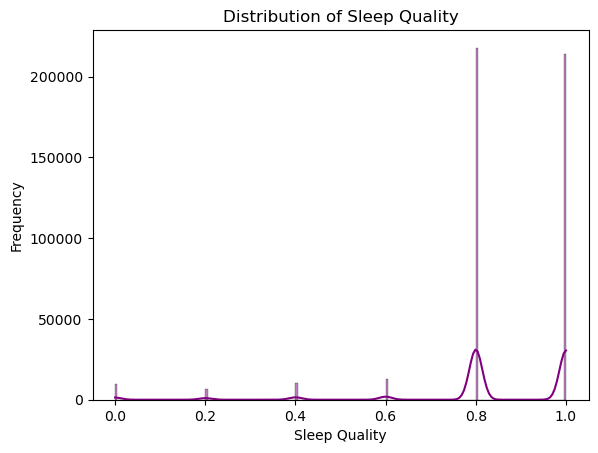

In [14]:
# sleep quality distrubution:


sns.histplot(lifestyle_studsleepdf['sleep_quality'], kde=True, color='purple')
plt.title("Distribution of Sleep Quality")
plt.xlabel("Sleep Quality")
plt.ylabel("Frequency")
plt.show()


In [15]:
print(mentalhealthdf.info)

<bound method DataFrame.info of       stress_level physical_activity
4240           0.4              High
6193           0.0          Moderate
118            0.0              High
77             0.2          Moderate
5616           0.2          Moderate
...            ...               ...
4352           0.0          Moderate
5394           0.4               Low
710            0.8          Moderate
2949           0.4              High
4007           0.0              High

[702 rows x 2 columns]>


## Data Analysis: 


In [16]:

#Correlation: 

correlation = lifestyle_studsleepdf[['stress_level', 'academic_performance']].corr()
print("Correlation between Stress Level and Academic Performance:")
print(correlation)


# Key Statistics: 
print(lifestyle_studsleepdf[['stress_level', 'academic_performance']].describe())


Correlation between Stress Level and Academic Performance:
                      stress_level  academic_performance
stress_level              1.000000             -0.000532
academic_performance     -0.000532              1.000000
        stress_level  academic_performance
count  471580.000000         471580.000000
mean        0.499486              0.848815
std         0.290725              0.202224
min         0.000000              0.000000
25%         0.300000              0.800000
50%         0.500000              0.800000
75%         0.700000              1.000000
max         1.000000              1.000000


In [17]:
avg_stress_exercise = mentalhealthdf.groupby('physical_activity')['stress_level'].mean()
print("Average Stress Level by Physical Activity Level:")
print(avg_stress_exercise)



avg_stress_performance = lifestyle_studsleepdf.groupby('stress_level')['academic_performance'].mean()
print("Average Stress Level by Academic Performance:")
print(avg_stress_performance)

Average Stress Level by Physical Activity Level:
physical_activity
High        0.444156
Low         0.486957
Moderate    0.453372
Name: stress_level, dtype: float64
Average Stress Level by Academic Performance:
stress_level
0.0    0.848085
0.1    0.851696
0.2    0.850858
0.3    0.849853
0.4    0.850286
0.5    0.836419
0.6    0.850105
0.7    0.849529
0.8    0.851193
0.9    0.849653
1.0    0.850094
Name: academic_performance, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data
X = lifestyle_studsleepdf[['stress_level']]
y = lifestyle_studsleepdf['academic_performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.040365842292375984


In [19]:
from sklearn.tree import DecisionTreeRegressor

# Prepare data
X = pd.get_dummies(mentalhealthdf[['physical_activity']], drop_first=True)
y = mentalhealthdf['stress_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Evaluate model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.10361633415797697
